# Summary
- the rand networks' layers look the same...

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [4]:
# loading in them all made my machine run out of memory
method_l = [
    "maxcorr", 
#     "mincorr", 
#     "maxlinreg", 
#     "minlinreg", 
#     "cca", 
    "lincka", 
    # "rbfcka",
]

In [5]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results15_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

In [6]:
network_l

['gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_0',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_1',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_2',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_3',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_4',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_5',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_6',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_7',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_9',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_10',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_11',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_12',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_13',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_14',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_15',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_16',
 'gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_17',
 'gpt2_medium-ptb_po

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [7]:
# rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}
rk_methods = {"maxcorr"} #, "mincorr", "maxlinreg", "minlinreg"}

In [8]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [9]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [10]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_0
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_1
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_2
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_3
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_4
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_5
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_6
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_7
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_9
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_10
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_11
         maxcorr
maxcorr

### Distributions

In [11]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_0:

maxcorr

maxcounts
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_0                 311
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_1                  91
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           66
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_1                 55
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_0            52
                                                                ... 
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_15      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_12      1
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8                  1
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_23                 1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_13      1
Length: 71, dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          134
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24       


maxcounts
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_6          934
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_4           88
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_4             1
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24         93
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          92
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           89
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22          55
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23          51
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20          49
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21          47
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    43
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11           40
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19          35
gpt2_small-ptb_pos_dev_rand_inclu

          max       min       med
max  1.000000  0.329767  0.490350
min  0.329767  1.000000  0.359866
med  0.490350  0.359866  1.000000


gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_13:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_12    522
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_14    500
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_4        1
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_11      1
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           86
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          69
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    50
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24         48
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20          47
                                                                 ..
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_11     1
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_1     

          max       min       med
max  1.000000  0.366788  0.524948
min  0.366788  1.000000  0.476480
med  0.524948  0.476480  1.000000


gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_21:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_22    594
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_20    429
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_4        1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    50
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           49
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11           48
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          47
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_0            43
                                                                 ..
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_4       1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_7      1
xlnet_base_cased-ptb_pos_dev_rand_include_embedd

          max       min       med
max  1.000000  0.301245  0.450657
min  0.301245  1.000000  0.691602
med  0.450657  0.691602  1.000000


gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_4:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_5    873
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_3    151
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23         181
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24         172
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_0           111
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0       63
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1           59
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2           46
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           45
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3       28
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0      27
xlnet_base_cased-

          max       min       med
max  1.000000  0.305042  0.457306
min  0.305042  1.000000  0.624314
med  0.457306  0.624314  1.000000


gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_12:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_13    672
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_11    352
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_0           142
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23         115
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0       85
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24          76
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_1       60
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1           58
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           57
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_2       51
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2           46
xlnet_base_cas

          max       min       med
max  1.000000  0.293790  0.434136
min  0.293790  1.000000  0.583624
med  0.434136  0.583624  1.000000


gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21    596
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19    428
dtype: int64

mincounts
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_0           128
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0       98
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23          82
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0      72
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1           63
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_1       60
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2           55
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           54
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3       53
xlnet_base_cas

gpt2_small-ptb_pos_dev_include_embeddings.hdf5_4    702
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_2     66
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24         96
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          77
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           72
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22          47
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23          34
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21          33
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11           33
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19          29
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20          29
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    29
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_10           22
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17          22
gpt2_medium-ptb_pos_dev_rand_include_embeddings.


maxcounts
gpt2_small-ptb_pos_dev_include_embeddings.hdf5_11          761
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      7
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          52
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           48
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_0            48
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_0           34
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    29
                                                                 ..
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_9      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_6      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_12     1
Length: 79, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.2


maxcounts
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_9    532
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_7    236
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23         163
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24         106
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_0            76
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0       41
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1           39
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2           36
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0           34
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_1       29
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0      27
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3       25
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_2       22
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_4       20
xlnet_base_case

          max       min       med
max  1.000000 -0.128221  0.284725
min -0.128221  1.000000  0.207996
med  0.284725  0.207996  1.000000


xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_4:

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_3     395
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_5     372
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      1
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           84
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          66
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22          43
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23          41
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    35
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21          34
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11           33
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20          28
gpt2_small-ptb_pos_dev_rand_i

          max       min       med
max  1.000000  0.161749  0.280810
min  0.161749  1.000000  0.395881
med  0.280810  0.395881  1.000000


xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_0:

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_1    768
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24     214
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23      71
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22      56
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21      53
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20      49
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19      38
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_16      35
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17      32
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_18      31
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_15      30
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf


maxcounts
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_8     401
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_10    367
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24     163
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23      73
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22      70
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21      49
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12       46
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20      41
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19      41
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17      37
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_18      33
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_15      28
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_16      24
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_12      22
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_14      

gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          119
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           102
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21           55
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23           53
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22           47
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11            47
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19           42
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20           41
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_18           37
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_16           37
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_10            32
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_14           31
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24     30
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17           28
gpt2_medium-ptb_pos_dev_rand_inclu


maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_11    884
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13    140
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24    88
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           81
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          69
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_11           48
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_23    41
                                                                 ..
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_3            1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_7      1
xlnet_base_cased-ptb_pos_dev_rand_include_embeddings.hdf5_2       1
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_1            1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_6      1
Length: 73, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0

          max       min       med
max  1.000000  0.130407  0.350187
min  0.130407  1.000000  0.362677
med  0.350187  0.362677  1.000000


xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21    562
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19    462
dtype: int64

mincounts
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12           91
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24          75
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_10           45
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_0           43
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_8            43
                                                                 ..
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_9      1
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_2      1
xlnet_base_cased-ptb

          max       min       med
max  1.000000  0.444996  0.548140
min  0.444996  1.000000  0.593349
med  0.548140  0.593349  1.000000


xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_3:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_4    528
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_2    496
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24     253
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23     104
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22      85
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21      67
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_16      50
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_18      50
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19      47
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17      46
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20      39
gpt2_small-ptb_pos_dev_rand_include_embeddin

          max       min       med
max  1.000000  0.346384  0.528040
min  0.346384  1.000000  0.505898
med  0.528040  0.505898  1.000000


xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_11:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_12    523
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_10    501
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24     139
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22      96
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23      93
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_21      64
gpt2_small-ptb_pos_dev_rand_include_embeddings.hdf5_12       54
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_20      53
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_19      46
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_17      39
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_15      37
xlnet_large_cased-ptb_pos_dev_include_emb

          max       min       med
max  1.000000  0.269844  0.359854
min  0.269844  1.000000  0.408610
med  0.359854  0.408610  1.000000


xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_19:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_18    543
xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_20    481
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    133
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     93
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_24      86
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_23      59
gpt2_medium-ptb_pos_dev_rand_include_embeddings.hdf5_22      48
                                                           ... 
xlnet_base_cased-ptb_pos_dev_include_embeddings.hdf5_7        1
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8             1
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_10      1
gpt2_small-ptb_pos_dev_rand_include_embed

# LinCKA

In [12]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(network_l, axis=1)
#lincka_df = lincka_df.reindex(lincka_df.columns)

In [13]:
lincka_df.head(50)

,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_0,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_1,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_2,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_3,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_4,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_5,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_6,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_7,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8,gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_9,...,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_15,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_16,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_17,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_18,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_19,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_20,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_21,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_22,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_23,xlnet_large_cased-ptb_pos_dev_rand_include_embeddings.hdf5_24
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_0,NaN,0.877794,0.863057,0.770783,0.742179,0.741881,0.741744,0.741639,0.741937,0.742140,...,0.243089,0.236088,0.230900,0.218803,0.210964,0.196985,0.186428,0.172522,0.160363,0.144481
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_1,0.877794,NaN,0.979172,0.928955,0.909963,0.909544,0.909190,0.909366,0.909499,0.909776,...,0.100845,0.097984,0.095860,0.091594,0.089076,0.083774,0.079702,0.074511,0.069338,0.062862
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_2,0.863057,0.979172,NaN,0.953422,0.933192,0.932718,0.932359,0.932371,0.932603,0.932822,...,0.103639,0.100653,0.098316,0.094266,0.091580,0.086134,0.082028,0.076516,0.071167,0.064564
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_3,0.770783,0.928955,0.953422,NaN,0.996846,0.996679,0.996381,0.996262,0.996349,0.996304,...,0.035759,0.034624,0.033260,0.032944,0.032022,0.030158,0.028886,0.026885,0.024542,0.022084
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_4,0.742179,0.909963,0.933192,0.996846,NaN,0.999902,0.999814,0.999752,0.999733,0.999756,...,0.020101,0.019402,0.018299,0.018735,0.018238,0.017140,0.016545,0.015399,0.013750,0.012251
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_5,0.741881,0.909544,0.932718,0.996679,0.999902,NaN,0.999860,0.999791,0.999773,0.999782,...,0.020276,0.019567,0.018457,0.018879,0.018367,0.017248,0.016643,0.015478,0.013813,0.012299
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_6,0.741744,0.909190,0.932359,0.996381,0.999814,0.999860,NaN,0.999914,0.999842,0.999768,...,0.020410,0.019688,0.018580,0.018996,0.018491,0.017358,0.016755,0.015582,0.013911,0.012387
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_7,0.741639,0.909366,0.932371,0.996262,0.999752,0.999791,0.999914,NaN,0.999968,0.999826,...,0.020444,0.019718,0.018599,0.019011,0.018505,0.017371,0.016766,0.015600,0.013932,0.012408
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_8,0.741937,0.909499,0.932603,0.996349,0.999733,0.999773,0.999842,0.999968,NaN,0.999940,...,0.020537,0.019807,0.018694,0.019098,0.018589,0.017450,0.016842,0.015668,0.013993,0.012465
gpt2_medium-ptb_pos_dev_include_embeddings.hdf5_9,0.742140,0.909776,0.932822,0.996304,0.999756,0.999782,0.999768,0.999826,0.999940,NaN,...,0.020545,0.019813,0.018703,0.019109,0.018602,0.017467,0.016861,0.015698,0.014025,0.012501


In [14]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

# RBFCKA

In [15]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [16]:
# rbfcka_df

In [17]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [ ]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [ ]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(network_l, axis=1)
# sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(network_l, axis=1)
# pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(network_l, axis=1)
# sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(network_l, axis=1)
# pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(network_l, axis=1)
# pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [ ]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [ ]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [ ]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [18]:
# layer order

In [24]:
short_labels = [label.split('_')[0] + ' ' + label.split('_')[1].rstrip('-ptb') + ' ' +  '' if label.split('_')[-4] == 'dev' else label.split('_')[-4] + ' ' + label.split('_')[-1] for label in network_l]
print(short_labels)

['gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'gpt2 medium ', 'rand 0', 'rand 1', 'rand 2', 'rand 3', 'rand 4', 'rand 5', 'rand 6', 'rand 7', 'rand 8', 'rand 9', 'rand 10', 'rand 11', 'rand 12', 'rand 13', 'rand 14', 'rand 15', 'rand 16', 'rand 17', 'rand 18', 'rand 19', 'rand 20', 'rand 21', 'rand 22', 'rand 23', 'rand 24', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'gpt2 small ', 'rand 0', 'rand 1', 'rand 2', 'rand 3', 'rand 4', 'rand 5', 'rand 6', 'rand 7', 'rand 8', 'rand 9', 'rand 10', 'rand 11', 'rand 12', 'xlnet

In [25]:
plt.rcParams["figure.figsize"] = (20,15)

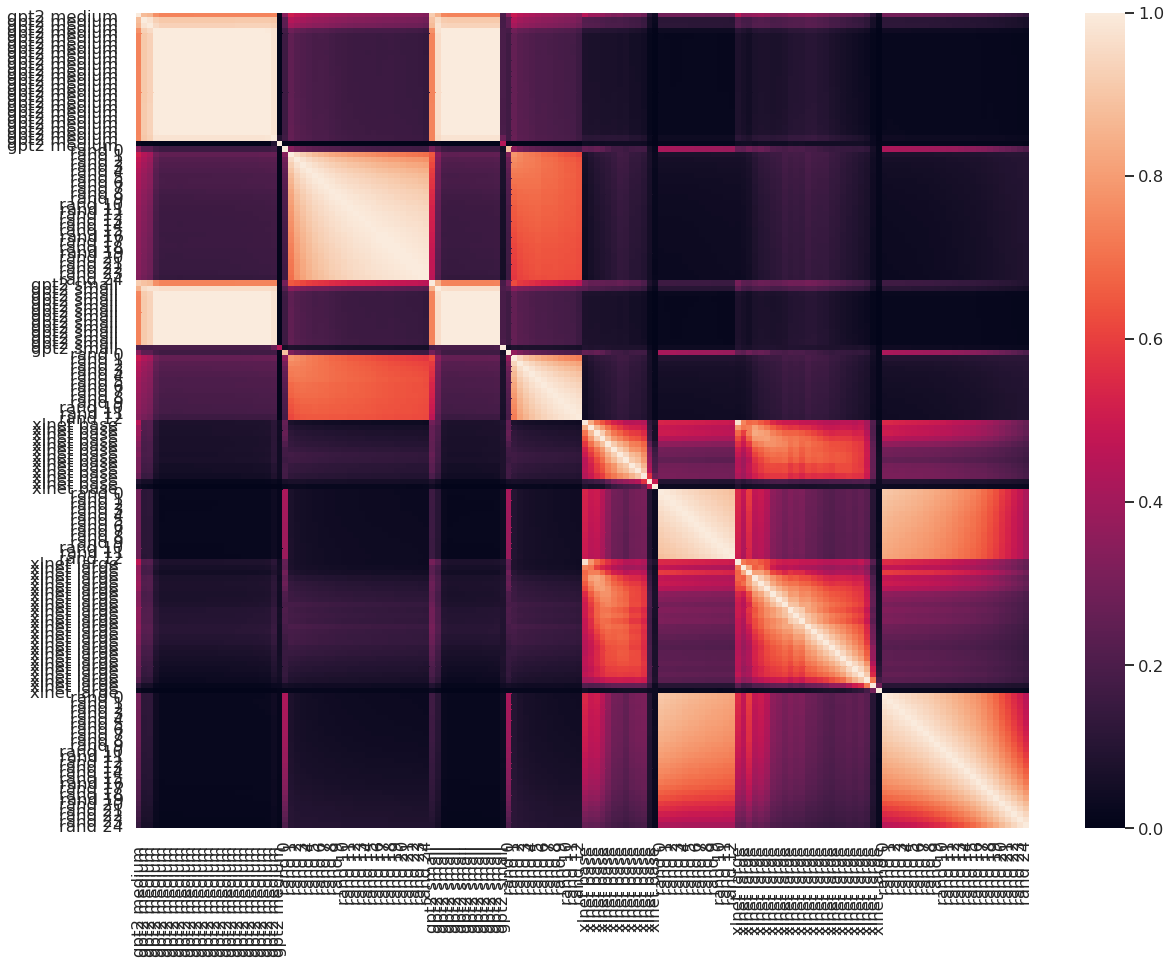

In [26]:
# lincka
g = sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
# g = sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)
g.get_figure().savefig('random-lincka-heatmap.pdf')

In [27]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname, transparent=True)
        plt.show()

In [ ]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw13_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

In [ ]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv13_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

In [ ]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l)
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l, axis=1)
# maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

In [ ]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(network_l)
linreg_corrs_df = linreg_corrs_df.reindex(network_l, axis=1)
# linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

In [ ]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [ ]:
# comparing models
# use lincka
model1 = "xlnet"
model2 = "xlnet"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [ ]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()